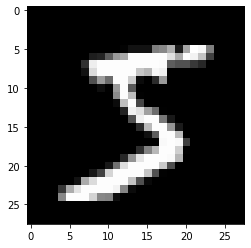

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

plt.imshow(X_train[0], cmap="gray")

In [3]:
# Scale features
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [45]:
# separate 8's from rest of dataset
eights_bool_array_train = y_train == 8
eights_bool_array_test = y_test == 8
ones_bool_array_train = y_train == 1
ones_bool_array_test = y_test == 1
X_train_scaled_eights = X_train_scaled[eights_bool_array_train]
X_train_scaled_ones = X_train_scaled[ones_bool_array_train]
X_test_scaled_eights = X_test_scaled[eights_bool_array_test]
X_test_scaled_ones = X_test_scaled[ones_bool_array_test]

In [57]:
# Build autoencoder
encoder_input = keras.Input(shape=(28,28,1), name="img")
flatten = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(flatten)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")

decoder_input = keras.layers.Dense(784, activation="relu")(encoder_output)
decoder_output = keras.layers.Reshape((28,28,1))(decoder_input)

opt = keras.optimizers.Adam(lr=0.001, decay=1e-6)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.compile(opt, loss="mse")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_9 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape_4 (Reshape)          (None, 28, 28, 1)         0         
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [58]:
# fit autoencoder
autoencoder.fit(X_train_scaled_ones, X_train_scaled_ones, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3
190/190 [==============================] - 1s 3ms/step - loss: 0.0286 - val_loss: 0.0090
Epoch 2/3
190/190 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0074
Epoch 3/3
190/190 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0068


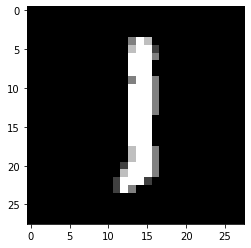

In [67]:
# test example
test_image = X_test_scaled_ones[2]
plt.imshow(test_image, cmap="gray")

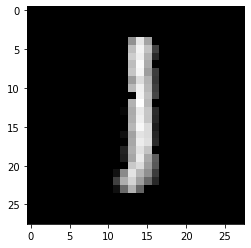

In [68]:
# test encoded & decoded
ae_out = autoencoder.predict([test_image.reshape(-1, 28, 28, 1)])[0]
plt.imshow(ae_out, cmap="gray")

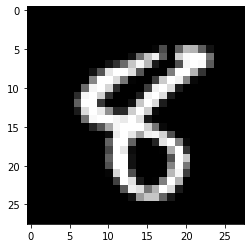

In [69]:
# test example
test_image = X_test_scaled_eights[1]
plt.imshow(test_image, cmap="gray")

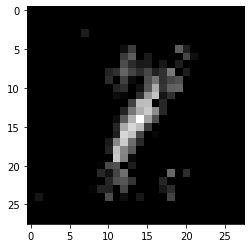

In [70]:
# test encoded & decoded
ae_out = autoencoder.predict([test_image.reshape(-1, 28, 28, 1)])[0]
plt.imshow(ae_out, cmap="gray")